In [1]:
import warnings
import joblib
from compare import *
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#load your data into the dataframe
my_data = read_csv('COM726.csv')

In [3]:
my_data.head()

,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt),Unnamed: 16
0,North East,Darlington,Darlington,E06000005,2005.0,188.7,104.9,47.5,262.5,214.0,-0.9,816.7,100.3,8.1,197.5,4.1,NaN
1,North East,Darlington,Darlington,E06000005,2006.0,175.9,108.2,46.7,260.3,210.1,-1.4,799.8,101.5,7.9,197.5,4.1,NaN
2,North East,Darlington,Darlington,E06000005,2007.0,170.7,102.8,44.7,251.2,208.4,-2.0,775.7,102.6,7.6,197.5,3.9,NaN
3,North East,Darlington,Darlington,E06000005,2008.0,177.3,101.8,44.3,252.2,193.1,-2.3,766.4,103.7,7.4,197.5,3.9,NaN
4,North East,Darlington,Darlington,E06000005,2009.0,149.2,89.3,38.7,228.8,190.2,-2.3,693.9,104.4,6.6,197.5,3.5,NaN


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Country           5685 non-null   object 
 1   Second_Tier_Authority    5685 non-null   object 
 2   Local_Authority          5685 non-null   object 
 3   Code                     5685 non-null   object 
 4   Year                     5685 non-null   float64
 5   Industry_Total           5685 non-null   float64
 6   Commercial_Total         5685 non-null   float64
 7   Public_Sector_Total      5685 non-null   float64
 8   Domestic_Total           5685 non-null   float64
 9   Transport_Total          5685 non-null   float64
 10  LULUCF_Net_Emissions     5685 non-null   float64
 11  Grand_Total              5685 non-null   float64
 12  Population               5685 non-null   float64
 13  Per_Capita_Emissions(t)  5685 non-null   float64
 14  Area(km2)               

In [5]:
my_data.shape

(5747, 17)

In [420]:
my_data.columns

Index(['Region_Country', 'Second_Tier_Authority', 'Local_Authority', 'Code',
       'Year', 'Industry_Total', 'Commercial_Total', 'Public_Sector_Total',
       'Domestic_Total', 'Transport_Total', 'LULUCF_Net_Emissions',
       'Grand_Total', 'Population', 'Per_Capita_Emissions(t)', 'Area(km2)',
       'Emissions_per_km2(kt)', 'Unnamed: 16'],
      dtype='object')

In [421]:
my_data.isnull()

,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt),Unnamed: 16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5743,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5744,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5745,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [422]:
my_data.isnull().sum()

Region_Country               62
Second_Tier_Authority        62
Local_Authority              62
Code                         62
Year                         62
Industry_Total               62
Commercial_Total             62
Public_Sector_Total          62
Domestic_Total               62
Transport_Total              62
LULUCF_Net_Emissions         62
Grand_Total                  62
Population                   62
Per_Capita_Emissions(t)      62
Area(km2)                    62
Emissions_per_km2(kt)        62
Unnamed: 16                5747
dtype: int64

In [443]:
#check our data for missing value
my_data = my_data[my_data.isna().any(axis=1)]
print('\n These are the missing data \n', my_data)


 These are the missing data 
      Region_Country Second_Tier_Authority Local_Authority       Code    Year  \
0        North East            Darlington      Darlington  E06000005  2005.0   
1        North East            Darlington      Darlington  E06000005  2006.0   
2        North East            Darlington      Darlington  E06000005  2007.0   
3        North East            Darlington      Darlington  E06000005  2008.0   
4        North East            Darlington      Darlington  E06000005  2009.0   
...             ...                   ...             ...        ...     ...   
5742            NaN                   NaN             NaN        NaN     NaN   
5743            NaN                   NaN             NaN        NaN     NaN   
5744            NaN                   NaN             NaN        NaN     NaN   
5745            NaN                   NaN             NaN        NaN     NaN   
5746            NaN                   NaN             NaN        NaN     NaN   

      In

In [3]:
# Drop column with Nan value
my_data = my_data.drop(['Unnamed: 16'], axis=1)
my_data.head()

,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,North East,Darlington,Darlington,E06000005,2005.0,188.7,104.9,47.5,262.5,214.0,-0.9,816.7,100.3,8.1,197.5,4.1
1,North East,Darlington,Darlington,E06000005,2006.0,175.9,108.2,46.7,260.3,210.1,-1.4,799.8,101.5,7.9,197.5,4.1
2,North East,Darlington,Darlington,E06000005,2007.0,170.7,102.8,44.7,251.2,208.4,-2.0,775.7,102.6,7.6,197.5,3.9
3,North East,Darlington,Darlington,E06000005,2008.0,177.3,101.8,44.3,252.2,193.1,-2.3,766.4,103.7,7.4,197.5,3.9
4,North East,Darlington,Darlington,E06000005,2009.0,149.2,89.3,38.7,228.8,190.2,-2.3,693.9,104.4,6.6,197.5,3.5


In [4]:
# Drop rows which have all NaN in its row
my_data=my_data.dropna(how='all')

In [426]:
my_data.isnull().sum()

Region_Country             0
Second_Tier_Authority      0
Local_Authority            0
Code                       0
Year                       0
Industry_Total             0
Commercial_Total           0
Public_Sector_Total        0
Domestic_Total             0
Transport_Total            0
LULUCF_Net_Emissions       0
Grand_Total                0
Population                 0
Per_Capita_Emissions(t)    0
Area(km2)                  0
Emissions_per_km2(kt)      0
dtype: int64

In [427]:
my_data.tail()

,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
5680,Northern Ireland,Northern Ireland,"Newry, Mourne and Down",N09000010,2015.0,413.9,63.2,12.0,349.7,453.6,76.4,1368.7,176.4,7.8,1682.3,0.8
5681,Northern Ireland,Northern Ireland,"Newry, Mourne and Down",N09000010,2016.0,424.5,57.0,10.3,333.1,457.9,77.4,1360.3,177.8,7.7,1682.3,0.8
5682,Northern Ireland,Northern Ireland,"Newry, Mourne and Down",N09000010,2017.0,407.0,49.7,8.7,314.3,458.8,78.7,1317.1,179.0,7.4,1682.3,0.8
5683,Northern Ireland,Northern Ireland,"Newry, Mourne and Down",N09000010,2018.0,399.0,50.9,8.3,318.3,453.1,81.1,1310.7,180.0,7.3,1682.3,0.8
5684,Northern Ireland,Northern Ireland,"Newry, Mourne and Down",N09000010,2019.0,391.4,49.2,7.7,310.2,442.5,83.2,1284.3,181.4,7.1,1682.3,0.8


In [428]:
#Check duplicate rows in data
duplicate_rows = my_data[my_data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 16)


In [5]:
my_data['Year'] = my_data['Year'].apply(np.int64)

print(my_data.dtypes)

Region_Country              object
Second_Tier_Authority       object
Local_Authority             object
Code                        object
Year                         int64
Industry_Total             float64
Commercial_Total           float64
Public_Sector_Total        float64
Domestic_Total             float64
Transport_Total            float64
LULUCF_Net_Emissions       float64
Grand_Total                float64
Population                 float64
Per_Capita_Emissions(t)    float64
Area(km2)                  float64
Emissions_per_km2(kt)      float64
dtype: object


In [430]:
my_data.Year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019], dtype=int64)

In [431]:
my_data.Region_Country.nunique()

12

In [432]:
my_data.Region_Country.unique()

array(['North East', 'North West', 'Yorkshire and the Humber',
       'East Midlands', 'West Midlands', 'East of England', 'London',
       'South East', 'South West', 'Wales', 'Scotland',
       'Northern Ireland'], dtype=object)

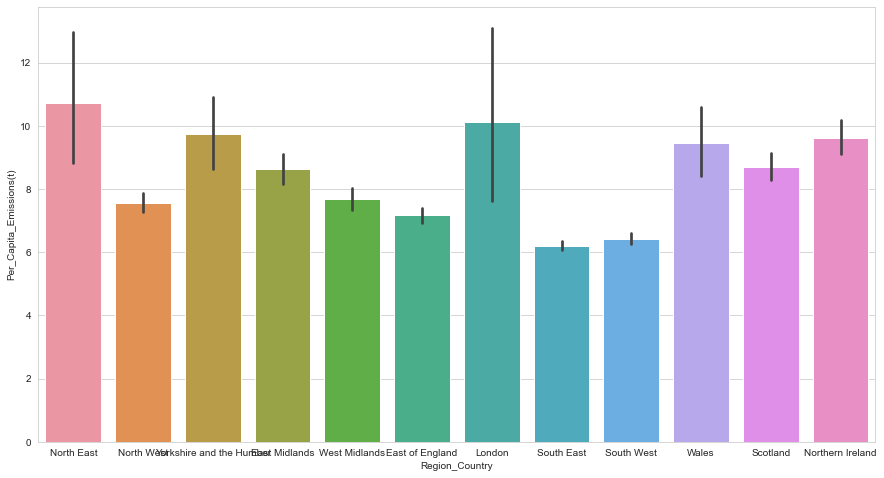

In [433]:
#per capita emission based on region/country
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Region_Country', y='Per_Capita_Emissions(t)', data=my_data)

(-1.1081216077010747,
 1.1019635418712024,
 -1.1020596272106853,
 1.1000980800951874)

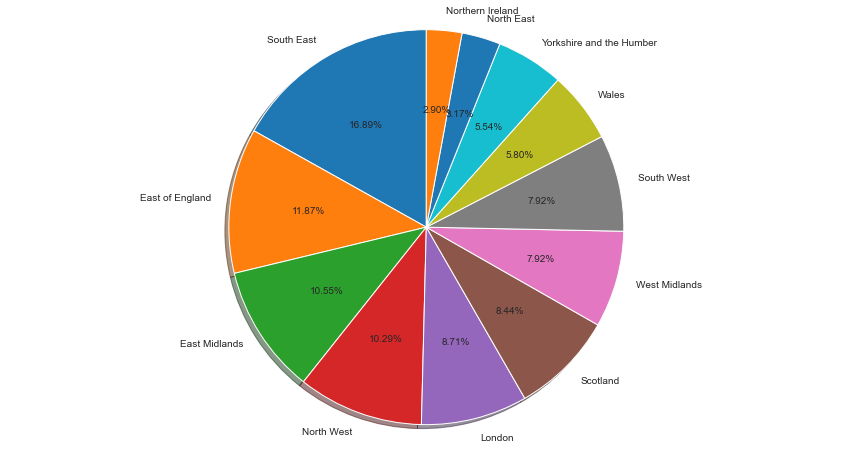

In [440]:
data = my_data['Region_Country'].value_counts()
fig1, ax1 = plt.subplots(figsize = (15,8))
ax1.pie(data, labels=data.index, autopct='%1.2f%%', shadow= True, startangle= 90)
ax1.axis('equal')

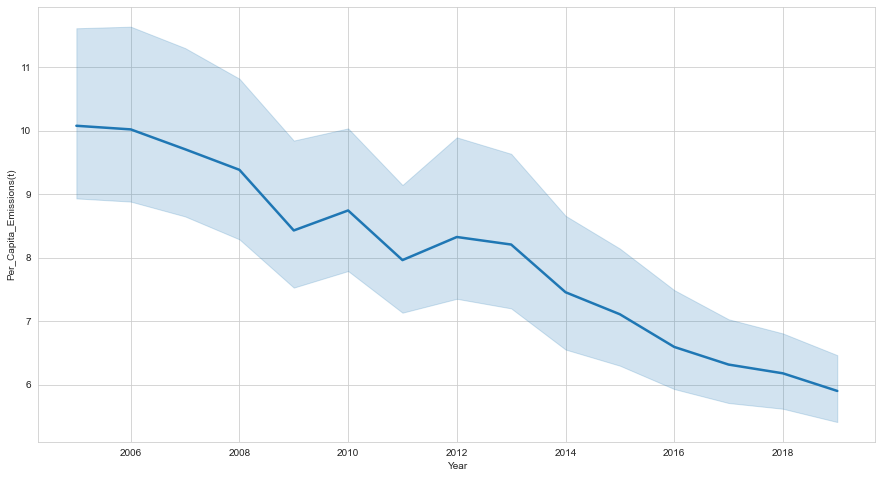

In [193]:
# per capita emission based on year
plt.figure(figsize = (15,8))
ax = sns.lineplot(x='Year', y='Per_Capita_Emissions(t)', data=my_data, linewidth= 2.5)

In [194]:
# ordinal encoding-----mapping desired order with a dictionary
# region_dict= {'North East':1, 'North West':2, 'Yorkshire and the Humber':3, 'East Midlands':4,
#  'West Midlands':5, 'East of England':6, 'London':7, 'South East':8, 'South West':9,
#  'Wales':10, 'Scotland':11, 'Northern Ireland':12}
#
# # assigning the values
# my_data['Encoded_Region'] = my_data.Region_Country.map(region_dict)
# my_data

In [195]:
my_data.describe(include='all')#get the data stat using the describe method

,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
count,5685,5685,5685,5685,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000
unique,12,151,379,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,South East,Scotland,Darlington,E06000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,960,480,15,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2012.000000,297.525928,141.302674,50.575374,332.576640,337.383043,4.145347,1163.510536,168.009059,8.025048,656.245646,8.978892
std,NaN,NaN,NaN,NaN,4.320874,697.539149,150.151810,54.754418,220.761836,222.669136,130.014403,971.528930,113.538071,10.988921,1629.068377,25.149838
min,NaN,NaN,NaN,NaN,2005.000000,0.800000,1.600000,0.200000,2.800000,2.400000,-1305.400000,8.600000,2.200000,2.100000,3.100000,0.000000
25%,NaN,NaN,NaN,NaN,2008.000000,85.200000,61.800000,19.800000,199.000000,183.300000,-13.800000,641.800000,97.100000,5.000000,95.100000,1.400000
50%,NaN,NaN,NaN,NaN,2012.000000,154.700000,98.500000,33.400000,271.500000,296.400000,-2.900000,919.100000,133.800000,6.400000,273.000000,3.600000
75%,NaN,NaN,NaN,NaN,2016.000000,276.800000,163.300000,58.800000,391.700000,422.400000,1.400000,1349.400000,206.500000,8.300000,661.100000,10.000000


In [196]:
corrMatrix = my_data.corr()
corrMatrix

,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
Year,1.000000e+00,-0.078082,-0.231085,-0.182259,-0.244261,-0.039263,-0.012858,-0.168273,0.046718,-0.121711,-5.205501e-14,-0.061815
Industry_Total,-7.808231e-02,1.000000,0.140982,0.134390,0.160059,0.174443,0.006859,0.824613,0.112661,0.424378,7.554249e-02,0.012944
Commercial_Total,-2.310854e-01,0.140982,1.000000,0.841576,0.619078,0.425074,-0.073179,0.531511,0.578106,0.299404,6.364249e-03,0.599884
Public_Sector_Total,-1.822587e-01,0.134390,0.841576,1.000000,0.749494,0.479699,-0.047992,0.556747,0.741981,-0.003896,-2.447516e-02,0.273203
Domestic_Total,-2.442611e-01,0.160059,0.619078,0.749494,1.000000,0.747035,-0.109220,0.636672,0.912262,-0.097038,1.341801e-01,0.031893
Transport_Total,-3.926297e-02,0.174443,0.425074,0.479699,0.747035,1.000000,-0.081831,0.605972,0.713028,-0.018681,1.846291e-01,-0.086792
LULUCF_Net_Emissions,-1.285837e-02,0.006859,-0.073179,-0.047992,-0.109220,-0.081831,1.000000,0.081163,-0.091190,0.115082,-3.725305e-01,-0.005541
Grand_Total,-1.682731e-01,0.824613,0.531511,0.556747,0.636672,0.605972,0.081163,1.000000,0.570567,0.339818,7.679542e-02,0.104017
Population,4.671829e-02,0.112661,0.578106,0.741981,0.912262,0.713028,-0.091190,0.570567,1.000000,-0.148155,3.420208e-02,0.069457
Per_Capita_Emissions(t),-1.217113e-01,0.424378,0.299404,-0.003896,-0.097038,-0.018681,0.115082,0.339818,-0.148155,1.000000,1.530258e-02,0.730594


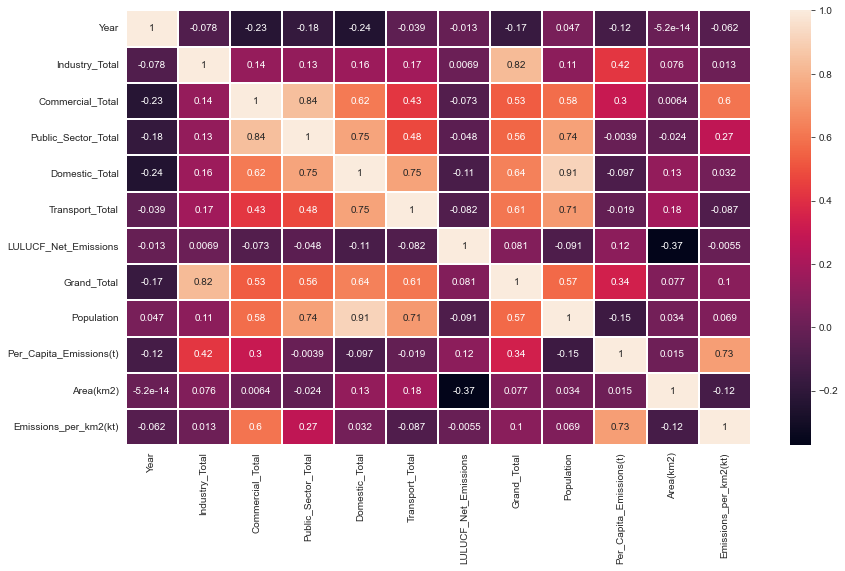

In [197]:
plt.figure(figsize=(14, 8))
sns.heatmap(corrMatrix, annot=True, linewidth=0.1)
plt.show()

In [6]:
# Drop columns
my_data = my_data.drop(['Region_Country','Second_Tier_Authority','Local_Authority','Code','Grand_Total'], axis=1)
my_data.head()

,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,2005,188.7,104.9,47.5,262.5,214.0,-0.9,100.3,8.1,197.5,4.1
1,2006,175.9,108.2,46.7,260.3,210.1,-1.4,101.5,7.9,197.5,4.1
2,2007,170.7,102.8,44.7,251.2,208.4,-2.0,102.6,7.6,197.5,3.9
3,2008,177.3,101.8,44.3,252.2,193.1,-2.3,103.7,7.4,197.5,3.9
4,2009,149.2,89.3,38.7,228.8,190.2,-2.3,104.4,6.6,197.5,3.5


In [199]:
print(my_data.skew())

Year                        0.000000
Industry_Total              8.911354
Commercial_Total            4.642959
Public_Sector_Total         3.376461
Domestic_Total              2.673481
Transport_Total             2.095296
LULUCF_Net_Emissions       -1.308628
Population                  2.760154
Per_Capita_Emissions(t)    14.429020
Area(km2)                  11.215920
Emissions_per_km2(kt)      14.379148
dtype: float64


In [200]:
KurtosisValue = my_data.kurtosis(axis=1)
print("Kurtosis:")
print(KurtosisValue)

Kurtosis:
0       10.256701
1       10.284045
2       10.312541
3       10.326498
4       10.407021
          ...    
5680     1.813086
5681     1.806690
5682     1.834063
5683     1.850340
5684     1.877573
Length: 5685, dtype: float64


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Industry_Total'}>,
        <AxesSubplot:title={'center':'Commercial_Total'}>],
       [<AxesSubplot:title={'center':'Public_Sector_Total'}>,
        <AxesSubplot:title={'center':'Domestic_Total'}>,
        <AxesSubplot:title={'center':'Transport_Total'}>],
       [<AxesSubplot:title={'center':'LULUCF_Net_Emissions'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Per_Capita_Emissions(t)'}>],
       [<AxesSubplot:title={'center':'Area(km2)'}>,
        <AxesSubplot:title={'center':'Emissions_per_km2(kt)'}>,
        <AxesSubplot:>]], dtype=object)

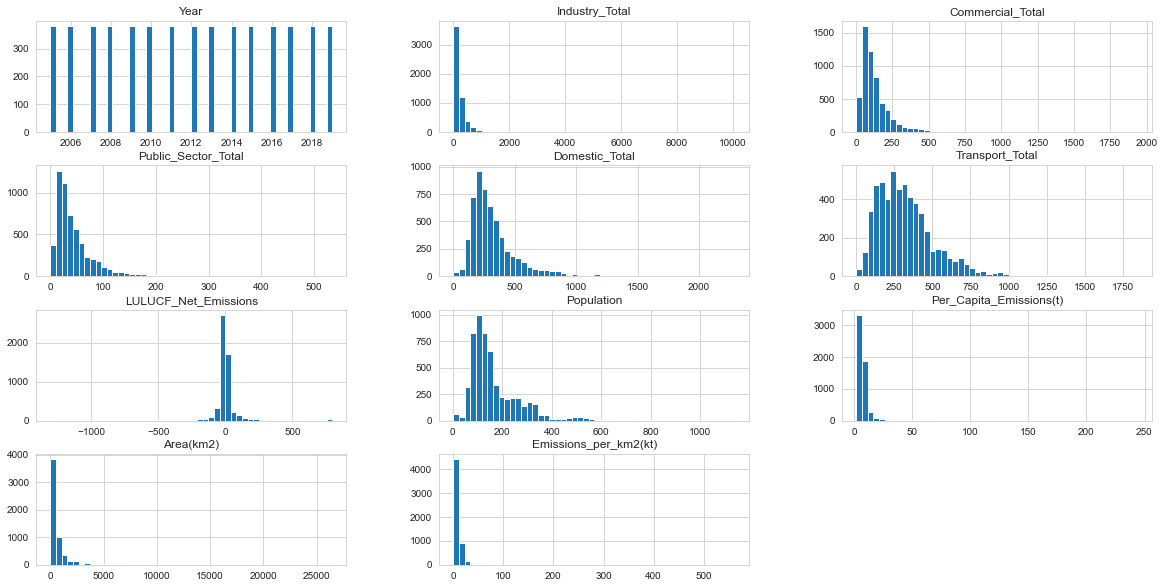

In [201]:
my_data.hist(figsize=(20,10),bins=50)

Year                          AxesSubplot(0.125,0.125;0.0596154x0.755)
Industry_Total             AxesSubplot(0.196538,0.125;0.0596154x0.755)
Commercial_Total           AxesSubplot(0.268077,0.125;0.0596154x0.755)
Public_Sector_Total        AxesSubplot(0.339615,0.125;0.0596154x0.755)
Domestic_Total             AxesSubplot(0.411154,0.125;0.0596154x0.755)
Transport_Total            AxesSubplot(0.482692,0.125;0.0596154x0.755)
LULUCF_Net_Emissions       AxesSubplot(0.554231,0.125;0.0596154x0.755)
Population                 AxesSubplot(0.625769,0.125;0.0596154x0.755)
Per_Capita_Emissions(t)    AxesSubplot(0.697308,0.125;0.0596154x0.755)
Area(km2)                  AxesSubplot(0.768846,0.125;0.0596154x0.755)
Emissions_per_km2(kt)      AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

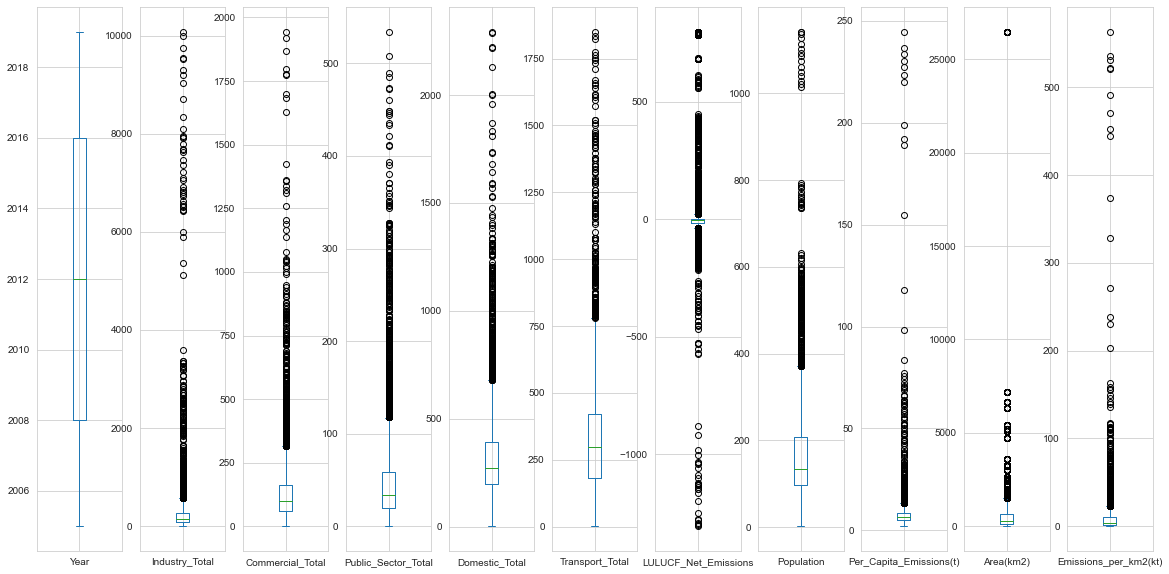

In [202]:
my_data.plot(kind='box',  subplots=True, sharey=False, figsize=(20, 10))

In [226]:
# m= my_data.loc[:, my_data.columns != 'Year']
# m

,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,188.7,104.9,47.5,262.5,214.0,-0.9,100.3,8.1,197.5,4.1
1,175.9,108.2,46.7,260.3,210.1,-1.4,101.5,7.9,197.5,4.1
2,170.7,102.8,44.7,251.2,208.4,-2.0,102.6,7.6,197.5,3.9
3,177.3,101.8,44.3,252.2,193.1,-2.3,103.7,7.4,197.5,3.9
4,149.2,89.3,38.7,228.8,190.2,-2.3,104.4,6.6,197.5,3.5
...,...,...,...,...,...,...,...,...,...,...
5680,413.9,63.2,12.0,349.7,453.6,76.4,176.4,7.8,1682.3,0.8
5681,424.5,57.0,10.3,333.1,457.9,77.4,177.8,7.7,1682.3,0.8
5682,407.0,49.7,8.7,314.3,458.8,78.7,179.0,7.4,1682.3,0.8
5683,399.0,50.9,8.3,318.3,453.1,81.1,180.0,7.3,1682.3,0.8


<AxesSubplot:xlabel='Per_Capita_Emissions(t)', ylabel='Density'>

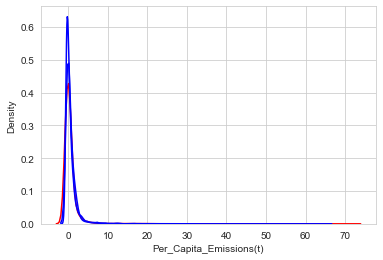

In [227]:
# #scaling with robust scaler
# robustscaler = RobustScaler()
# my_data.loc[:, my_data.columns != 'Year'] = robustscaler.fit_transform(m)
# my_data
# sns.kdeplot(my_data['Per_Capita_Emissions(t)'], color ='r')
# sns.kdeplot(my_data['Commercial_Total'], color ='b')
# sns.kdeplot(my_data['Emissions_per_km2(kt)'], color ='b')

<AxesSubplot:xlabel='Per_Capita_Emissions(t)', ylabel='Density'>

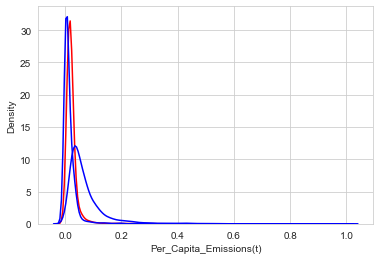

In [215]:
# #scaling wit min max scaler
# minscaler = MinMaxScaler()
# my_data.loc[:, my_data.columns != 'Year'] = minscaler.fit_transform(m)
# my_data
# sns.kdeplot(my_data['Per_Capita_Emissions(t)'], color ='r')
# sns.kdeplot(my_data['Commercial_Total'], color ='b')
# sns.kdeplot(my_data['Emissions_per_km2(kt)'], color ='b')

In [7]:
X = my_data.drop('Per_Capita_Emissions(t)', axis=1) #  X= my_data.iloc[:,:-1]
y = my_data['Per_Capita_Emissions(t)'] # y= my_data.iloc[:,-1]

In [448]:
#declare a linear model
regress_model = LinearRegression()

#recursive feature elimination
rfe = RFE(regress_model, n_features_to_select=5, step=1)
rfe = rfe.fit(X, y)

print("Number of features", rfe.n_features_)
print("Selected Features", rfe.support_)
print("Feature Ranking", rfe.ranking_)

Number of features 5
Selected Features [False False  True False  True  True False  True False  True]
Feature Ranking [2 4 1 5 1 1 3 1 6 1]


In [449]:
ffe = f_regression(X,y)
variab = []
for i in range(0, len(X.columns)-1):
    if ffe[0][i] >=10:  #check variables importance over 10 percent
        variab.append(X.columns[i])

print(variab)

['Year', 'Industry_Total', 'Commercial_Total', 'Domestic_Total', 'LULUCF_Net_Emissions', 'Population']


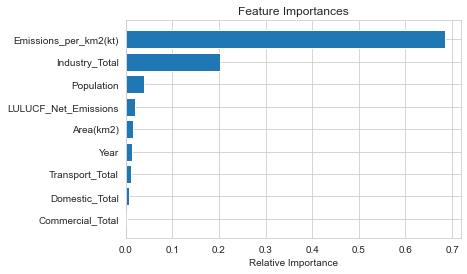

In [28]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X, y)
t_features = X.columns
relevance= rf_model.feature_importances_
imp = np.argsort(relevance)[-9:] #Top 10 features
plt.title('Feature Importances')
plt.barh(range(len(imp)), relevance[imp],align='center')
plt.yticks(range(len(imp)), [t_features[i] for i in imp])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
#split the data into train and test - split using 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [387]:
#check the number of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)


 The total of training dataset (3979, 10)

 The total of test dataset (1706, 10)


In [257]:
scaler = RobustScaler().fit(X_train)
train_sc = scaler.transform(X_train)

test_sc = scaler.transform(X_test)

In [258]:
scaler.n_features_in_

10

RANDOM FOREST REGRESSOR

In [9]:
rf_model = RandomForestRegressor(random_state = 0)
#fit the model to the training set
model1 = rf_model.fit(X_train, y_train)
#predict the model
y_pred = model1.predict(X_test)
#predict model on train data
y_pred_train = model1.predict(X_train)

In [10]:
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 =  r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train) )

Mean absolute error: 0.35
Mean squared error: 2.51
Root mean squared error: 1.58
Mean absolute percentage error:, 0.04
r2 score:0.97
R2 Score Train data:1.00


In [11]:
# Metrics
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9726923317506204, 1.5841863481603247)

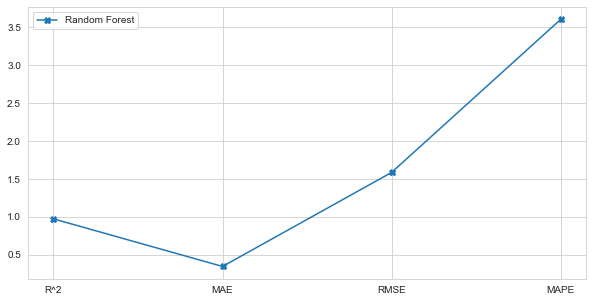

In [12]:
plot = compare()
plot.add('Random Forest', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

GRADIENT BOOSTING REGRESSOR

In [13]:
#initialise the model
gb_model = GradientBoostingRegressor(random_state = 0)
#fit gb model to the training set
model2 = gb_model.fit(X_train, y_train.ravel())  #use ravel to avoid warning about 2d array
#predict the model
y_pred = model2.predict(X_test)
#predict model on train data
y_pred_train = model2.predict(X_train)

In [14]:
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 =  r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train) )

Mean absolute error: 0.57
Mean squared error: 2.86
Root mean squared error: 1.69
Mean absolute percentage error:, 0.07
r2 score:0.97
R2 Score Train data:1.00


In [15]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9689087974216535, 1.6903736631447472)

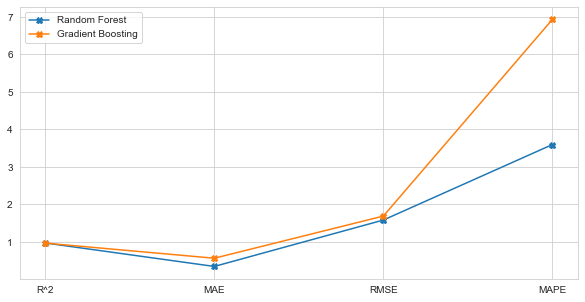

In [16]:
plot.add('Gradient Boosting', y_test, y_pred)
plot.show(figsize=(10, 5))

XGBOOST REGRESSOR

In [277]:
# #initialise the model
# xgb = XGBRegressor(random_state=0)
# #fit the model to the training set
# model4 = xgb.fit(X_train, y_train)
# #predict the model
# y_pred = model4.predict(X_test)
# #predict model on train data
# y_pred_train = model4.predict(X_train)
# #evaluate
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# #the r2 for the train dataset
# r2_train = r2_score(y_train, y_pred_train)
#
# #printing the model evaluation values
# print('Mean absolute error: {:.2f}'.format(mae))
# print('Mean squared error: {:.2f}'.format(mse))
# print('Root mean squared error: {:.2f}'.format(rmse))
# print('Mean absolute percentage error:, {:.2f}'.format(mape))
# print('r2 score:{:.2f}'.format(r2))
# print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.34
Mean squared error: 2.95
Root mean squared error: 1.72
Mean absolute percentage error:, 0.03
r2 score:0.97
R2 Score Train data:1.00


In [278]:
# compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9678696382962063, 1.7183901105774313)

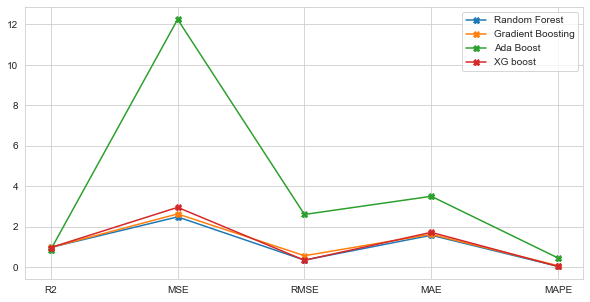

In [279]:
# plot.add('XG boost', y_test, y_pred)
# plot.show(figsize=(10, 5))

KNEIGHBORS REGRESSOR

In [17]:
#initialise the model
knn = KNeighborsRegressor()
#fit the to the training set
model5 = knn.fit(X_train, y_train.ravel())  #use ravel to avoid warning about 2d array
#predict the model
y_pred = model5.predict(X_test)
#predict model on train data
y_pred_train = model5.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.56
Mean squared error: 3.27
Root mean squared error: 1.81
Mean absolute percentage error:, 0.06
r2 score:0.96
R2 Score Train data:1.00


In [18]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9644318347905243, 1.807984440584991)

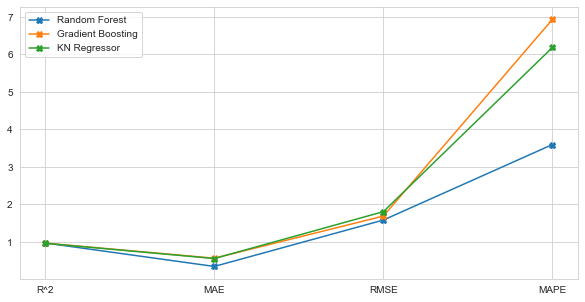

In [19]:
plot.add('KN Regressor', y_test, y_pred)
plot.show(figsize=(10, 5))

SUPPORT VECTOR REGRESSOR

In [20]:
#initialise the model
svr_model = LinearSVR(random_state=0)
#fit gb model to the training set
model6 = svr_model.fit(X_train, y_train)
#predict the model
y_pred = model6.predict(X_test)
#predict model on train data
y_pred_train = model6.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 3.08
Mean squared error: 20.45
Root mean squared error: 4.52
Mean absolute percentage error:, 0.44
r2 score:0.78
R2 Score Train data:0.83


In [21]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.777505657916093, 4.521925918392053)

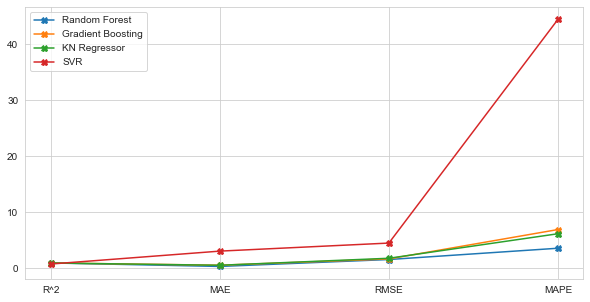

In [22]:
plot.add('SVR', y_test, y_pred)
plot.show(figsize=(10, 5))

STACKING REGRESSOR

In [25]:
estimators = [('rf', RandomForestRegressor(random_state = 0)),
              ('svr', LinearSVR(random_state=0)),
              ('knr', KNeighborsRegressor())]

final_estimator = GradientBoostingRegressor(random_state = 0)
reg = StackingRegressor(
estimators=estimators,
final_estimator=final_estimator)
stackmod = reg.fit(X_train, y_train)

In [26]:
#predict the model
y_pred = stackmod.predict(X_test)
#predict model on train data
y_pred_train = stackmod.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.39
Mean squared error: 2.69
Root mean squared error: 1.64
Mean absolute percentage error:, 0.04
r2 score:0.97
R2 Score Train data:1.00


In [27]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9707081096474512, 1.6407320332413409)

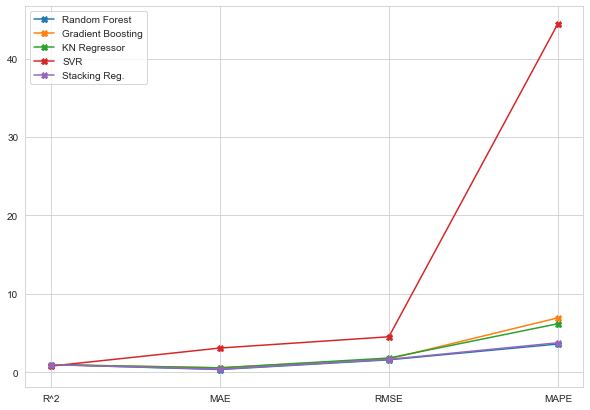

In [28]:
plot.add('Stacking Reg.', y_test, y_pred)
plot.show(figsize=(10, 7))

In [25]:
estimators = [('rf', RandomForestRegressor(random_state=0)),

              ('knr', KNeighborsRegressor())]

final_estimator = GradientBoostingRegressor(random_state=0)
reg2 = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)
stackmod2 = reg2.fit(X_train, y_train)
#predict the model
y_pred = stackmod2.predict(X_test)
#predict model on train data
y_pred_train = stackmod2.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.38
Mean squared error: 2.41
Root mean squared error: 1.55
Mean absolute percentage error:, 0.04
r2 score:0.97
R2 Score Train data:1.00


In [26]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9738222916540435, 1.5510641846173485)

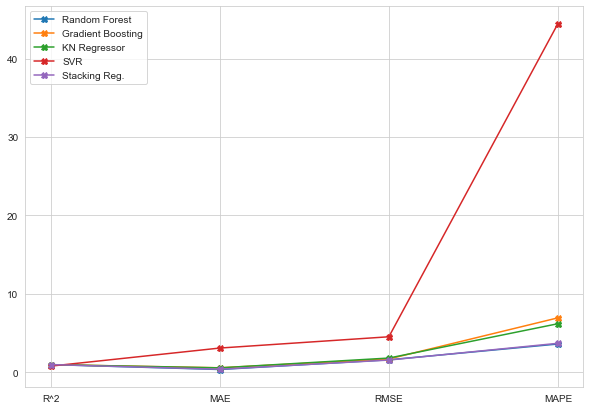

In [27]:
plot.add('Stacking Reg.', y_test, y_pred)
plot.show(figsize=(10, 7))

VOTING REGRESSOR

In [29]:
reg1 = GradientBoostingRegressor(random_state=0)
reg2 = RandomForestRegressor(random_state=0)
reg3 = KNeighborsRegressor()
reg4 = LinearSVR(random_state = 0)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('knn', reg3), ('svr', reg4)])
votemod = ereg.fit(train_sc, y_train)


NameError: name 'train_sc' is not defined

In [ ]:
#predict the model
y_pred = votemod.predict(test_sc)
#predict model on train data
y_pred_train = votemod.predict(train_sc)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

In [30]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9707081096474512, 1.6407320332413409)

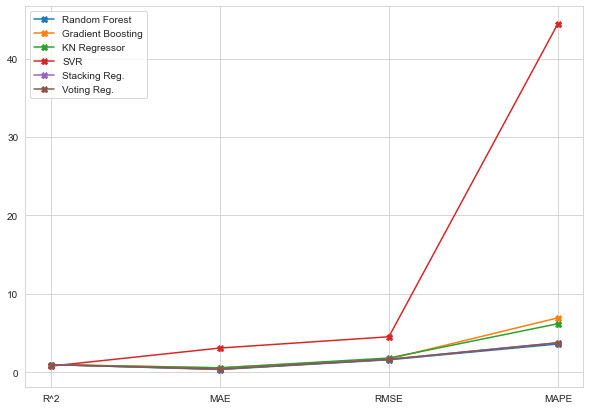

In [31]:
plot.add('Voting Reg.', y_test, y_pred)
plot.show(figsize=(10, 7))

In [32]:
#saving model to disk
final_model = 'rf_model.sav'
joblib.dump(rf_model, final_model)

['rf_model.sav']

In [33]:
#saving model to disk
final_model = 'reg.sav'
joblib.dump(reg, final_model)

['reg.sav']

In [34]:
#saving model to disk
final_model = 'ereg.sav'
joblib.dump(ereg, final_model)

['ereg.sav']

In [455]:
#saving model to disk
final_model = 'gb_model.sav'
joblib.dump(gb_model, final_model)

['gb_model.sav']